# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Data

In [2]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df = pd.read_csv('2_data_condensed.csv', low_memory=False, parse_dates=parse_dates)

In [3]:
df.head()

,num_sales,sell_orders,last_sale.event_type,id,token_id,name,traits,description,is_presale,image_url,...,collection.medium_username,collection.chat_url,creator.user.username,creator.config,creator.profile_img_url,creator.discord_id,owner.address,owner.config,owner.profile_img_url,owner.discord_id
0,0,NaN,NaN,30033345,9132198125583360689797322472203169750011716430...,Chad Olozumin,[],NaN,True,https://storage.opensea.io/files/b09d044f17573...,...,NaN,NaN,CryptoHamstersOfficial,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
1,0,NaN,NaN,30033344,3268304683559065074852929730958675774624902165...,IconPunk #149 Elton John,"[{'trait_type': 'id', 'value': '0149', 'displa...",24x24 pixels and pushing the limit to the max!...,True,https://lh3.googleusercontent.com/P7NXQatzHWTt...,...,NaN,NaN,iconpunks,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
2,0,NaN,NaN,30033343,7779220728716121010175700030620486582973273824...,PlagueDoctor #234,"[{'trait_type': 'id', 'value': '234', 'display...",Where are the sick - There I Am. Healing since...,True,https://lh3.googleusercontent.com/qCzcK3sEGp2R...,...,NaN,NaN,PlagueDr,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
3,0,NaN,NaN,30033342,9510190511962339173712504282354773321324120343...,Crypto Graphic #47/999,[],#crypto #abstract #art #collectible #rarible #...,True,https://lh3.googleusercontent.com/iDHrRY_ko62L...,...,NaN,NaN,Vezzen_Dragon,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
4,0,NaN,NaN,30033341,1029511648543007736247727748847500291464805430...,380,"[{'trait_type': 'Clothes', 'value': 'Tanktop',...",NaN,True,https://lh3.googleusercontent.com/LrBXq8LND7W-...,...,NaN,NaN,BoredAlien,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN


# Target & Feature Engineering

## Engineer Target

In [5]:
(df['num_sales'] > 0).value_counts(normalize=True)

False    0.546255
True     0.453745
Name: num_sales, dtype: float64

In [7]:
df['last_sale.event_type'].notna().sum()/len(df)

0.35111279942795853

In [8]:
df['sell_orders'].notna().sum()/len(df)

0.22461565963532357

In [9]:
len(df[(df['num_sales'] > 0) | 
       (df['sell_orders'].notna()) | 
       (df['last_sale.event_type'].notna())])/len(df)

0.6027663568108688

In [10]:
df['target'] = np.where((df['num_sales'] > 0) | 
                        (df['sell_orders'].notna()) | 
                        (df['last_sale.event_type'].notna()), 1, 0)

In [19]:
df['target'].value_counts(normalize=True)

1    0.602766
0    0.397234
Name: target, dtype: float64

In [18]:
df = df.drop(labels = ['num_sales', 'sell_orders', 'last_sale.event_type'], axis=1)
df.head()

,id,token_id,name,traits,description,is_presale,image_url,background_color,external_link,token_metadata,...,collection.chat_url,creator.user.username,creator.config,creator.profile_img_url,creator.discord_id,owner.address,owner.config,owner.profile_img_url,owner.discord_id,target
0,30033345,9132198125583360689797322472203169750011716430...,Chad Olozumin,[],NaN,True,https://storage.opensea.io/files/b09d044f17573...,NaN,https://cryptohamsters.co/hamsters/16250054780...,NaN,...,NaN,CryptoHamstersOfficial,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
1,30033344,3268304683559065074852929730958675774624902165...,IconPunk #149 Elton John,"[{'trait_type': 'id', 'value': '0149', 'displa...",24x24 pixels and pushing the limit to the max!...,True,https://lh3.googleusercontent.com/P7NXQatzHWTt...,NaN,NaN,NaN,...,NaN,iconpunks,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
2,30033343,7779220728716121010175700030620486582973273824...,PlagueDoctor #234,"[{'trait_type': 'id', 'value': '234', 'display...",Where are the sick - There I Am. Healing since...,True,https://lh3.googleusercontent.com/qCzcK3sEGp2R...,NaN,NaN,NaN,...,NaN,PlagueDr,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
3,30033342,9510190511962339173712504282354773321324120343...,Crypto Graphic #47/999,[],#crypto #abstract #art #collectible #rarible #...,True,https://lh3.googleusercontent.com/iDHrRY_ko62L...,NaN,NaN,NaN,...,NaN,Vezzen_Dragon,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
4,30033341,1029511648543007736247727748847500291464805430...,380,"[{'trait_type': 'Clothes', 'value': 'Tanktop',...",NaN,True,https://lh3.googleusercontent.com/LrBXq8LND7W-...,NaN,NaN,NaN,...,NaN,BoredAlien,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0


In [13]:
df_isna = pd.DataFrame()

for column in df.columns:
    df_isna.loc['Null', column] = f"{df[column].isna().sum()/len(df):.2%}"
    df_isna.loc['Count', column] = df[column].count()
    df_isna.loc['Unique', column] = df[column].nunique()
    
with pd.option_context('display.max_rows', 150):
    display(df_isna.T.sort_values(by=['Null','Unique','Count'], ascending=True))

,Null,Count,Unique
is_presale,0.00%,44752,2
asset_contract.asset_contract_type,0.00%,44752,2
asset_contract.opensea_seller_fee_basis_points,0.00%,44752,2
collection.featured,0.00%,44752,2
collection.opensea_seller_fee_basis_points,0.00%,44752,2
target,0.00%,44752,2
asset_contract.schema_name,0.00%,44752,3
collection.safelist_request_status,0.00%,44752,4
asset_contract.seller_fee_basis_points,0.00%,44752,14
asset_contract.dev_seller_fee_basis_points,0.00%,44752,14


# Explore Data

## Explore Datetime

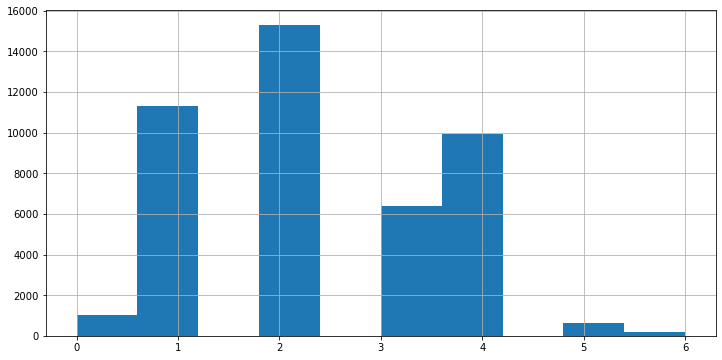

In [16]:
df['asset_contract.created_date'].dt.dayofweek.hist(figsize=[12,6])